In [12]:
#import necessary packages 
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import glob
import numpy as np

In [13]:
path1= "C:/Users/joana/Desktop/Master/second master/thesis/second thesis/data/goodreads_data.csv"
all_data=pd.read_csv(path1)

In [14]:
#remove duplicates, inplace = True
total_rows_raw=all_data.shape[0]
all_data.drop_duplicates(inplace=True)
total_rows_without_duplicates=all_data.shape[0]
print("The dataset without duplicates has: " + str(total_rows_without_duplicates) + " instances.")
total_duplicates=total_rows_raw - total_rows_without_duplicates
print("In total we have " + str(total_duplicates) + " duplicates.")

percentage_duplicates= (total_duplicates/total_rows_raw)*100
print("In total the duplicates represent " + str(round(percentage_duplicates,3)) + "% of the raw data sample")

The dataset without duplicates has: 3064912 instances.
In total we have 19690 duplicates.
In total the duplicates represent 0.638% of the raw data sample


In [15]:
#Change variables name 
all_data.rename(columns={"reader id": "reader_id", "book title": "book_title", "book url":"book_url", "date read": "date_read", "date added": "date_added", "average rating": "average_rating", "user rating": "user_rating", "members group link":"members_group_link", "group name": "group_name"}, inplace = True)


In [16]:
#index column where each row has is own value (row_id) starting in 1
all_data = all_data.reset_index()
all_data = all_data.rename(columns={"index":"row_id"})
all_data['row_id'] = all_data.index + 1

In [17]:
# Drop rows where date_added =0, we do not care about when the user finished the book or if it even finished.
#either in managerial terms and academic interest is the moment the consumer acts/engage/behaves to buy something
#NOTE:both variables are type "object", so 0 needs to be "0"


#all_data= all_data.loc[(all_data["date_read"] != "0") & (all_data["date_added"] !="0"),]
all_data= all_data.loc[all_data["date_added"] !="0",]
data_without0= all_data.shape[0]
data_total0= total_rows_without_duplicates - data_without0
data_percentage0= round((data_total0/total_rows_raw)*100,2)
print("After removing the books without date_added and date_read we now have " + str(data_without0) + " instances, "  + "in total " + str(data_total0) + " instances were removed" + " which represents " + str(data_percentage0) + "% of the raw datasample")



After removing the books without date_added and date_read we now have 3064912 instances, in total 0 instances were removed which represents 0.0% of the raw datasample


Lower Limit/Minimum: -204.5
First Quartile: 31.0
Third Quartile: 188.0
Upper Limit/Maximum: 423.5
IQR: 157.0


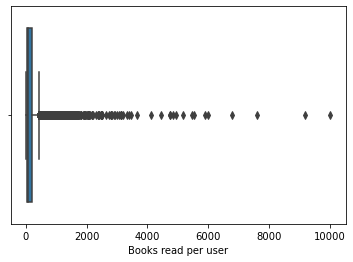

In [18]:
#Calculate 1,2,3,4 quartile and extra measure to draw a wiskers plot 
boxplot_sample = all_data.copy()
boxplot_sample=boxplot_sample.groupby('reader_id').count()
boxplot_sample=boxplot_sample.iloc[:, 0:1]
boxplot_sample.rename(columns = {'row_id':'books_read'}, inplace=True)

ax = sn.boxplot(x=boxplot_sample["books_read"])
ax.set_xlabel('Books read per user')


boxplot_sample["books_read"].describe()
q1=boxplot_sample["books_read"].quantile(0.25)
q3=boxplot_sample["books_read"].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

print("Lower Limit/Minimum: "+ str(lower_limit))
print("First Quartile: "+ str(q1))
print("Third Quartile: " +str(q3))
print("Upper Limit/Maximum: " + str(upper_limit))
print("IQR: " + str(iqr))

In [19]:
boxplot_sample.info()
boxplot_sample.head(10)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 19121 entries, 284.0 to 145149479.0
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   books_read  19121 non-null  int64
dtypes: int64(1)
memory usage: 298.8 KB


books_read
reader_id            
284.0             185
1950.0            111
6845.0            133
15618.0           156
19809.0           683
21452.0           244
27780.0           204
33738.0           155
36052.0            89
46340.0           110

In [20]:
#Create a "flag" variable where the upper outliers have a value of 1, the "normal" values have a value of 0

outliers=boxplot_sample.loc[boxplot_sample["books_read"] >upper_limit, :]
print("In total we have " + str(len(outliers)) + " outliers")
outliers = outliers.reset_index()
#outliers.sort_values("books_read", ascending=False)
outliers_id= outliers.loc[:, "reader_id"]

outliers_list=[]
for number in outliers_id:
    outliers_list.append(number)
#print(len(outliers_list))


all_data["flag"]=all_data["reader_id"].apply(lambda reader_id: "1" if reader_id in outliers_list else "0")
all_data["flag"] = all_data["flag"].astype(int)

In total we have 1426 outliers


In [21]:
dfsize_before_removingna=all_data.shape[0]

In [22]:
#make some checks to see if the lambda function worked 
all_data=all_data.dropna()  #need to drop "NA's"
dfsize_after_removingna=all_data.shape[0] #check the dataframe size after removing the NA's
print(dfsize_after_removingna)
flag_unique_values=all_data["flag"].unique()  #check which users are outliers or not via flag variable
df_total_outliers=all_data.groupby(['flag']).count()

total_outliers = df_total_outliers.iloc[1,2]  #see how many outliers
total_no_outliers = df_total_outliers.iloc[0,2]  #se how many are normal 

print("the number of outliers is " + str(total_outliers))
print("the number of non-outliers is " + str(total_no_outliers))
total_outliers + total_no_outliers == all_data.shape[0]  #the shape of the dataset need to be equal to the sum of flag variables and no flag variables



3064428
the number of outliers is 1187474
the number of non-outliers is 1876954


True

In [23]:
#tranform date_added and date_read in a date format and create variables week and year 
all_data["date_added"]=pd.to_datetime(all_data["date_added"])
all_data["year"] =all_data.date_added.apply(lambda x: x.year)
all_data["week"]= all_data.date_added.apply(lambda x: x.weekofyear)

In [24]:
#remove possible na values to create future time variables
all_data["week"].unique()  #one possible value is "nan"
all_data.dropna(inplace=True)
dfsize_after_removingna=all_data.shape[0]

In [25]:
#see how many "NA" instances were removed and calculate the global percentage
data_total_na = dfsize_before_removingna - dfsize_after_removingna
data_total_percentagena= round((data_total_na/total_rows_raw)*100,2)
print("After removing all instances with Na values we now have " + str(dfsize_after_removingna) + " instances, "  + "in total " + str(data_total_na) + " instances were removed" + " which represents " + str(data_total_percentagena) + "% of the raw data sample")



After removing all instances with Na values we now have 3064428 instances, in total 484 instances were removed which represents 0.02% of the raw data sample


In [26]:
#change the remaining variable type
all_data["week"] = all_data["week"].astype(int)
all_data["year"] = all_data["year"].astype(int)
all_data["reader_id"] =all_data["reader_id"].astype(int)

In [27]:
#although 2019 there is no problem there is siatuation for 2020: 28,29,30 and 31 December are a week
all_data[(all_data["week"] == 53) & (all_data["year"] == 2020)] 
all_data.loc[(all_data["week"] == 53) & (all_data["year"] == 2020), 'week'] = 52

#check that there is no longer a  problem 
all_data[(all_data["week"] == 53) & (all_data["year"] == 2020)] 

Empty DataFrame
Columns: [row_id, Unnamed: 0, reader_id, book_title, author_name, book_url, date_read, date_added, average_rating, flag, year, week]
Index: []

In [28]:
#FOR 2021
#the problem arrives from the year of 2021 starting on  friday whereas python assumes the week either starts on a sunday or a monday
#the 4 days in 2020 that belongto week 53 with this 3 starting days in year 2022 make the all week 
#i do in 2021 the same i did in 2020, but on the beggining of the year. Therefore week 1 from 2021 has 10 days


all_data[(all_data["week"] == 53) & (all_data["year"] == 2021)] 

#solve the problem for 2021
all_data.loc[(all_data["week"] == 53) & (all_data["year"] == 2021), 'week'] = 1

#check that there is no problem in 2021
all_data[(all_data["week"] == 53) & (all_data["year"] == 2021)] 

Empty DataFrame
Columns: [row_id, Unnamed: 0, reader_id, book_title, author_name, book_url, date_read, date_added, average_rating, flag, year, week]
Index: []

In [29]:
#create variable total week 
all_data["total_week"] = all_data[["year", "week"]].apply(lambda row:row[1] if row[0]==2019 else row[1]+52 if row[0]==2020 else row[1]+104 , axis=1)

In [30]:
#create variable"after" which indicates if the instance occured after the WHO pandemic declaration or not 
all_data["after"]=all_data["total_week"].apply(lambda total_week: 1 if (total_week >= 64) or (total_week >=12 and total_week <=52) else 0)

In [31]:
#create variable treated to check if the observations occuredin the control or treatment period
all_data["treated"]=all_data["year"].apply(lambda year: 0 if year == 2019 else 1)

In [32]:
#first option to achieve to the "final_dataset", use group by 
final_dataset=all_data[["reader_id","flag", "year", "week","total_week", "after", "treated", "date_added","book_title"]].groupby(["reader_id", "total_week"]).nunique()

#rneame variable "book_title" to "total_books"
final_dataset.rename(columns={"total_books": "book_title"}, inplace=True)

final_dataset.head(10)

flag  year  week  after  treated  date_added  book_title
reader_id total_week                                                          
284       1              1     1     1      1        1           2           2
          4              1     1     1      1        1           1           2
          5              1     1     1      1        1           1           3
          9              1     1     1      1        1           1           1
          10             1     1     1      1        1           4           7
          12             1     1     1      1        1           1           1
          13             1     1     1      1        1           1           1
          16             1     1     1      1        1           3           4
          18             1     1     1      1        1           1           1
          19             1     1     1      1        1           1           1

In [33]:
#rename variable "book_title" to "total_books"
final_dataset.rename(columns={"book_title":"total_books"}, inplace=True)
final_dataset = final_dataset.reset_index()

In [34]:
#second option to arrive to "final_dataset", but instead use pivot_tables
total_books_week=all_data.pivot_table(values = ["book_title"], index= ["reader_id"], columns= ["total_week"], aggfunc="nunique").fillna(0)

In [35]:
total_books_week

book_title                                               ...       \
total_week        1    2    3    4    5    6    7    8    9    10   ...  147   
reader_id                                                           ...        
284               2.0  0.0  0.0  2.0  3.0  0.0  0.0  0.0  1.0  7.0  ...  2.0   
1950              1.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  1.0   
6845              2.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  4.0  1.0  ...  0.0   
15618             0.0  2.0  0.0  1.0  1.0  1.0  3.0  2.0  0.0  1.0  ...  0.0   
19809             1.0  2.0  4.0  3.0  3.0  2.0  2.0  3.0  2.0  3.0  ...  1.0   
...               ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
145122356         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
145131884         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
145132487         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
145138921         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
145149479         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

                                                          
total_week  148  149  150  151  152  153  154  155   156  
reader_id                                                 
284         4.0  1.0  1.0  3.0  2.0  1.0  0.0  3.0   1.0  
1950        1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   1.0  
6845        0.0  0.0  2.0  1.0  0.0  2.0  0.0  1.0   1.0  
15618       0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   0.0  
19809       4.0  2.0  2.0  1.0  2.0  2.0  3.0  2.0   1.0  
...         ...  ...  ...  ...  ...  ...  ...  ...   ...  
145122356   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  23.0  
145131884   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   7.0  
145132487   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  18.0  
145138921   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  16.0  
145149479   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   3.0  

[19121 rows x 156 columns]

In [36]:
final_dataset.describe()

reader_id     total_week      flag      year      week     after  \
count  8.371490e+05  837149.000000  837149.0  837149.0  837149.0  837149.0   
mean   4.171682e+07      83.130427       1.0       1.0       1.0       1.0   
std    3.682197e+07      44.723781       0.0       0.0       0.0       0.0   
min    2.840000e+02       1.000000       1.0       1.0       1.0       1.0   
25%    9.046412e+06      46.000000       1.0       1.0       1.0       1.0   
50%    3.085130e+07      86.000000       1.0       1.0       1.0       1.0   
75%    6.650881e+07     122.000000       1.0       1.0       1.0       1.0   
max    1.451495e+08     156.000000       1.0       1.0       1.0       1.0   

        treated     date_added    total_books  
count  837149.0  837149.000000  837149.000000  
mean        1.0       1.647531       2.956361  
std         0.0       0.981534      10.035583  
min         1.0       1.000000       1.000000  
25%         1.0       1.000000       1.000000  
50%         1.0       1.000000       2.000000  
75%         1.0       2.000000       3.000000  
max         1.0      10.000000    3665.000000

In [37]:
total_unique_id=len(final_dataset["reader_id"].unique())
print("In total there are " + str(total_unique_id) + " unique reader_id's")

In total there are 19121 unique reader_id's


In [38]:
#all_users_id= list(final_dataset["reader_id"].unique())  #small sample, then need to replace by all unique user_id

#array_all_user_id=final_dataset["reader_id"].unique()
#array_all_user_id
df_iterate=final_dataset.loc[:,"reader_id"]
df_iterate=pd.DataFrame(df_iterate)
df_iterate=df_iterate.drop_duplicates()
df_iterate.head(10)

reader_id
0          284
110       1950
197       6845
280      15618
373      19809
520      21452
582      27780
690      33738
742      36052
774      46340

The next line of code was developed to retrive the personal information under the "detail" section of the user profile. Due to the size of the sample I do not advise to turn from markdown to code since it will take some hours to finish webscrapping. \
The final output is a csv file designated as country_userid, which i provide  under the "data" folder. 

#import relevant packages
import requests
from bs4 import BeautifulSoup
import random
from time import sleep

#create common variables to webscrape user profile
count=0
location=[]


for user_id in df2_iterate["reader_id"]:
    count+=1
    print(str(count) + "|" + str(df2_size))
    link_user= goodreads_url + str(user_id) #create the link to acess user profile
    print("The user link is: " + link_user)
    book_request = requests.get(link_user)              #request google Chrome to enter on the created link 
    book_source_code = book_request.text
    soup = BeautifulSoup(book_source_code)              #use BeautifulSoup 
    details=soup.find("title").text                     #request only the text regarding "title", which is where the user location is inserted (if case the user decides to give such information)
    print(details)
    pause=random.randint(1, 5)                          #generate a random number between 1-5 seconds
    sleep(pause)
    #df1_iterate.assign(country=details)
    location.append(details)

df2_iterate["country"]=location
df2_iterate.to_csv("country_data.csv", index=False)
print("Now you are done scraping!")

In [43]:
path2= "C:/Users/joana/Desktop/Master/second master/thesis/second thesis/data/country_userid.csv"
country_data=pd.read_csv(path2)

In [44]:
#drop duplicates in case of a possible mistake
country_data=country_data.drop_duplicates()

In [45]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20244 entries, 0 to 20243
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20244 non-null  int64 
 1   reader_id   20244 non-null  int64 
 2   country     20244 non-null  object
dtypes: int64(2), object(1)
memory usage: 632.6+ KB


In [46]:
#first part to get the countrylocation of the user

#clean the country dataframe 
#dont touch
def clean_version(column_name):
    column = column_name['country']
    column=column.lower().replace(",","")
    print(column)
    if "-" in column:
        location_start=column.index("-") +1 # after the user name it comes a - and then their location
        try:
            location_stop=column.index("(", location_start)  #some users include parateses on their names, so make sure you want the final parenteses
        except ValueError:
            location_stop= len(column)-1
            print("STRANGE1") 
            row="strange1"
    else:
        location_start=0  #this occur only for writters and translatours
        try:
            location_stop=column.index(")") 
        except ValueError:
            location_stop = len(column)-1
            print("STRANGE2") 
            row="strange2"
            #location_stop=row.index("(") 
            #print(row)
    row=column[location_start:location_stop].strip().split(" ")
    print(row)
    return row

#clean_version(country_data)                 
#df1_iterate["clean_version"] = df1_iterate.apply(clean_version, axis = 1)
country_data["clean_country"]=country_data.apply(clean_version, axis=1)

cindy iii (8248 books)
['cindy', 'iii', '(8248', 'books']
sarah (newlyblank) (1094 books)
['sarah', '(newlyblank']
arliss (ash5748) - lawrenceville ga (1255 books)
['lawrenceville', 'ga']
kevin mcgill (author of the merman and the moon forgotten)
['kevin', 'mcgill', '(author', 'of', 'the', 'merman', 'and', 'the', 'moon', 'forgotten']
lori pruyne - addison ny (221 books)
['addison', 'ny']
myndi  (12661 books)
['myndi', '', '(12661', 'books']
k. b. frazier (kirabutler) - montreal qc canada (975 books)
['montreal', 'qc', 'canada']
ann rincon - kalamazoo mi (443 books)
['kalamazoo', 'mi']
mariela mtz - mexicali 02 mexico (486 books)
['mexicali', '02', 'mexico']
mike - cleveland oh (1202 books)
['cleveland', 'oh']
brittany (britendo) (1673 books)
['brittany', '(britendo']
haider (harizvi) - toronto on canada (714 books)
['toronto', 'on', 'canada']
craig w. dressler (author of never fail)
['craig', 'w.', 'dressler', '(author', 'of', 'never', 'fail']
diane ~firefly~ - round rock tx (3894 book

['chris', 'bullock', '(author', 'of', "becky's", 'first', 'ever', 'day']
laura e. akers (author of dior or die)
['laura', 'e.', 'akers', '(author', 'of', 'dior', 'or', 'die']
ron (ronb626) - aurora or (2584 books)
['aurora', 'or']
chelsea - uk  the united kingdom (613 books)
['uk', '', 'the', 'united', 'kingdom']
tami richards (author of heroic vignettes)
['tami', 'richards', '(author', 'of', 'heroic', 'vignettes']
tyler j gray (author of holiday spirit)
['tyler', 'j', 'gray', '(author', 'of', 'holiday', 'spirit']
ilaria (baibe) - italy (928 books)
['italy']
sudhi (sudhireads) - singapore singapore (587 books)
['singapore', 'singapore']
rajesh rahgir (author of forever incomplete and other stories)
['rajesh', 'rahgir', '(author', 'of', 'forever', 'incomplete', 'and', 'other', 'stories']
kenechi udogu (author of aversion)
['kenechi', 'udogu', '(author', 'of', 'aversion']
kat ice (kwells4191) - lehigh acres fl (12177 books)
['lehigh', 'acres', 'fl']
kelly (nieceykelz) (750 books)
['kelly

shawn elisabeth (readingmama) - chicago il (3550 books)
['chicago', 'il']
scarlett sims (broomperson) - oak ridge tn (3422 books)
['oak', 'ridge', 'tn']
christine (hatorisblindeye) - utica ny (3793 books)
['utica', 'ny']
peter - sittard netherlands (421 books)
['sittard', 'netherlands']
az (a_krich) (1072 books)
['az', '(a_krich']
richard  savage (author of spanked!)
['richard', '', 'savage', '(author', 'of', 'spanked!']
keyona - brooklyn ny (3171 books)
['brooklyn', 'ny']
clarice (clariceasquith) - the united kingdom (259 books)
['the', 'united', 'kingdom']
corinne - the united states (339 books)
['the', 'united', 'states']
ed erwin - berkeley ca (2648 books)
['berkeley', 'ca']
margaret (marsenault13) - pitt meadows  bc canada (6274 books)
['pitt', 'meadows', '', 'bc', 'canada']
wendy (wendyblue1) - brampton ontario canada (8103 books)
['brampton', 'ontario', 'canada']
veronica245 - the united states (3741 books)
['the', 'united', 'states']
anne (kuritts) - antwerp belgium (1579 books

['home', 'by', 'the', 'sea', 'netherlands']
maddielucy(patti) - port saint lucie fl (2066 books)
['port', 'saint', 'lucie', 'fl']
diana gotsch - fort wayne in (3076 books)
['fort', 'wayne', 'in']
nicole johnson (nicoleann8211) (2583 books)
['nicole', 'johnson', '(nicoleann8211']
leanne (beauty & the book dragon) (becaw15) (913 books)
['leanne', '(beauty', '&', 'the', 'book', 'dragon']
ashbaria (braelynn) (505 books)
['ashbaria', '(braelynn']
ashlee (261 books)
['ashlee', '(261', 'books']
brianna (bookswithbri21) - canada (6223 books)
['canada']
shanna crones - the united states (1938 books)
['the', 'united', 'states']
vicki gooding - boise id (2654 books)
['boise', 'id']
alwaysreadingbooks - reading drinking and relaxing (alwaysreadingbooks) - memphis tn (5130 books)
['reading', 'drinking', 'and', 'relaxing']
zach - san francisco ca (2661 books)
['san', 'francisco', 'ca']
nicole hughes - columbia md (1453 books)
['columbia', 'md']
balan saleminate - singapore 00 singapore (8 books)
['s

lisa (lisaclarefox) (766 books)
['lisa', '(lisaclarefox']
sashagb - san antonio tx (790 books)
['san', 'antonio', 'tx']
jessica - netherlands (713 books)
['netherlands']
laura raine - hamilton on canada (251 books)
['hamilton', 'on', 'canada']
judy thomas - auckland e7 new zealand (10275 books)
['auckland', 'e7', 'new', 'zealand']
julienne (willowonders) (372 books)
['julienne', '(willowonders']
christopher day - hertfordshire the united kingdom (6657 books)
['hertfordshire', 'the', 'united', 'kingdom']
holden r. johnson (author of the red heir)
['holden', 'r.', 'johnson', '(author', 'of', 'the', 'red', 'heir']
egle morales (3724 books)
['egle', 'morales', '(3724', 'books']
steelbowyer (1012 books)
['steelbowyer', '(1012', 'books']
gandalfgrijs - zwolle netherlands (271 books)
['zwolle', 'netherlands']
nicole e. woolaston (author of valentine)
['nicole', 'e.', 'woolaston', '(author', 'of', 'valentine']
kylie vermaas (kylievermaas) - new salem nd (938 books)
['new', 'salem', 'nd']
breea

jordan juranek (388 books)
['jordan', 'juranek', '(388', 'books']
tabitha andries - antwerpen belgium (819 books)
['antwerpen', 'belgium']
matty (1277 books)
['matty', '(1277', 'books']
p.h. solomon (author of the bow of destiny)
['p.h.', 'solomon', '(author', 'of', 'the', 'bow', 'of', 'destiny']
jessy (jessytami) - mexico (1164 books)
['mexico']
leticia toraci ( of writers in lockdown)
['leticia', 'toraci', '(', 'of', 'writers', 'in', 'lockdown']
fatih akturk (fakturk) - turkey (615 books)
['turkey']
nicole felten (nicolemfelten) - saginaw mi (134 books)
['saginaw', 'mi']
aindrila choudhury - kolkata india (612 books)
['kolkata', 'india']
felipe peña - vancouver bc canada (879 books)
['vancouver', 'bc', 'canada']
belart wright (author of into a dark adventure)
['belart', 'wright', '(author', 'of', 'into', 'a', 'dark', 'adventure']
deepali kishtwal - india (293 books)
['india']
lily pis - italy (1123 books)
['italy']
clarissa baesso - rio de janeiro 21 brazil (300 books)
['rio', 'de', 

trees colle - gent 08 belgium (111 books)
['gent', '08', 'belgium']
jen - reston va (613 books)
['reston', 'va']
k.j. chapman (author of evo nation)
['k.j.', 'chapman', '(author', 'of', 'evo', 'nation']
diogo winck (diogowinck) - joinville brazil (359 books)
['joinville', 'brazil']
kris1980 - bergamo 09 italy (392 books)
['bergamo', '09', 'italy']
jasmína čmelíková - presov 05 slovakia (305 books)
['presov', '05', 'slovakia']
cassie doran - the united states (1620 books)
['the', 'united', 'states']
eveline kleijn (eveline-j) - capelle aan den ijssel 11 netherlands (587 books)
['j)', '-', 'capelle', 'aan', 'den', 'ijssel', '11', 'netherlands']
larissa moreira (larissamoreira) - recife brazil (152 books)
['recife', 'brazil']
stefania - italia  italy (1848 books)
['italia', '', 'italy']
vanessa albino - lisbon 14 portugal (150 books)
['lisbon', '14', 'portugal']
catherine lodewyckx - kortrijk 09 belgium (568 books)
['kortrijk', '09', 'belgium']
mirela cornea (775 books)
['mirela', 'cornea

daniela macaluso - novafeltria 10 italy (53 books)
['novafeltria', '10', 'italy']
june marie (dings) - norway (170 books)
['norway']
alchemistress - bremen 03 germany (141 books)
['bremen', '03', 'germany']
natalie (nattyxo) (408 books)
['natalie', '(nattyxo']
amber woodward - berkshire the united kingdom (499 books)
['berkshire', 'the', 'united', 'kingdom']
jorge perez - brazil (234 books)
['brazil']
alex - germany (579 books)
['germany']
georgiaaa - essex the united kingdom (335 books)
['essex', 'the', 'united', 'kingdom']
kenzie - bend or (313 books)
['bend', 'or']
holden maxwell - amritsar 23 india (476 books)
['amritsar', '23', 'india']
lidia craveiro (author of florbela espanca)
['lidia', 'craveiro', '(author', 'of', 'florbela', 'espanca']
dinokaefer66 - singen 01 germany (138 books)
['singen', '01', 'germany']
jasmine (lordejasmine) - the united kingdom (408 books)
['the', 'united', 'kingdom']
alisha29 - mumbai india (1612 books)
['mumbai', 'india']
giulia_arg (giuar95) - rome i

['mari', '(2968', 'books']
james oxyer (446 books)
['james', 'oxyer', '(446', 'books']
jody (jodymorrow) - gloucester uk the united kingdom (767 books)
['gloucester', 'uk', 'the', 'united', 'kingdom']
jamie rodgers - erie pa (312 books)
['erie', 'pa']
marzia figliolia - naples 04 italy (145 books)
['naples', '04', 'italy']
ellie walborn - grand rapids mi (1366 books)
['grand', 'rapids', 'mi']
──  ୨୧ dollette - morganville nj (56 books)
['morganville', 'nj']
karyn (onlykaryn) - dubai 03 the united arab emirates (305 books)
['dubai', '03', 'the', 'united', 'arab', 'emirates']
romina - trento 17 italy (286 books)
['trento', '17', 'italy']
heena (heenap123) (77 books)
['heena', '(heenap123']
venla (casodellibros) - finland (265 books)
['finland']
lady chryseiss (lady_chryseiss) - ghedi 09 italy (338 books)
['ghedi', '09', 'italy']
caleb hsu - philippines (175 books)
['philippines']
rachel (rachel_olivia) - edmonton alberta canada (432 books)
['edmonton', 'alberta', 'canada']
mandy roberts 

['karachi', '05', 'pakistan']
stéphanie | pelaminhaestante - portugal (553 books)
['portugal']
kayla - fairmont wv (85 books)
['fairmont', 'wv']
raza - nagpur maharashtra india (2109 books)
['nagpur', 'maharashtra', 'india']
paola buffa - montevideo 10 uruguay (2060 books)
['montevideo', '10', 'uruguay']
karita lucita - orizaba 30 mexico (29829 books)
['orizaba', '30', 'mexico']
eric - evart mi (343 books)
['evart', 'mi']
jonathan - maryville tn (307 books)
['maryville', 'tn']
josh levy - the united states (235 books)
['the', 'united', 'states']
micah hales (author of howl)
['micah', 'hales', '(author', 'of', 'howl']
katie jones - the united states (530 books)
['the', 'united', 'states']
coraline riley (witchywoman1996) - the united states (599 books)
['the', 'united', 'states']
gabrielle (gmommers) - the united states (684 books)
['the', 'united', 'states']
esra l - merksem 01 belgium (91 books)
['merksem', '01', 'belgium']
marc-antoine favreau - québec qc canada (440 books)
['antoine

shreeyukta - india (170 books)
['india']
lana (54 books)
['lana', '(54', 'books']
marianne (marianneh08) - charlotte nc (613 books)
['charlotte', 'nc']
lenna spinelli (poesdaughter) (391 books)
['lenna', 'spinelli', '(poesdaughter']
lola ♡ - oslo 12 norway (108 books)
['oslo', '12', 'norway']
alexallen8 (allexallen8) (82 books)
['alexallen8', '(allexallen8']
maggie reeves - owasso ok (190 books)
['owasso', 'ok']
wynter marie midnight - linden nc (6944 books)
['linden', 'nc']
lanna. (brvkkcrs) (575 books)
['lanna.', '(brvkkcrs']
joyce a.  miller (author of joe harris the moon)
['joyce', 'a.', '', 'miller', '(author', 'of', 'joe', 'harris', 'the', 'moon']
lacey friess - the united states (150 books)
['the', 'united', 'states']
amber (woodlandbookwitch) - the united states (191 books)
['the', 'united', 'states']
samantaa (155 books)
['samantaa', '(155', 'books']
ًbel (ceruleoblue) - argentina (888 books)
['argentina']
fernando iglesias (etchenicke) - sevilla 51 spain (458 books)
['sevilla

bárbara reis - portugal (202 books)
['portugal']
emily - claremore ok (129 books)
['claremore', 'ok']
konna - greece (78 books)
['greece']
eri - houston tx (98 books)
['houston', 'tx']
tanja königsgruber - windhaag 04 austria (158 books)
['windhaag', '04', 'austria']
lisa - peru (145 books)
['peru']
franunu - limache 01 chile (19 books)
['limache', '01', 'chile']
alfred billing (author of the king)
['alfred', 'billing', '(author', 'of', 'the', 'king']
olivia - brisbane australia (193 books)
['brisbane', 'australia']
mati - vercelli 12 italy (339 books)
['vercelli', '12', 'italy']
ignacio cobos (author of el náufrago del tiempo)
['ignacio', 'cobos', '(author', 'of', 'el', 'náufrago', 'del', 'tiempo']
sophie - crowthorne b3 the united kingdom (27 books)
['crowthorne', 'b3', 'the', 'united', 'kingdom']
supernanikunz - argentina (97 books)
['argentina']
nohe (nohebooklover) - monterrey 19 mexico (356 books)
['monterrey', '19', 'mexico']
adriana navarro - the united states (138 books)
['the

In [47]:
#RUN THIS IF YOU WANT TO USE THE MOST RECENT OXFORD RESPONSE TRACKER
def country_name(column_name):
    
    row = column_name["clean_country"]
    
    eua= ["states","wa","alabama", "al", "alaska", "ak", "arizona", "az", "arkansas", "ar", "california", "ca", "colorado", "co", "connecticut", "ct", "delaware", "de", "florida", "fl", "georgia", "ga", "hawaii", "hi", "idaho", "id", "illinois", "il", "indiana","in","iowa","ia","kansas", "ks","kentucky", "ky", "louisiana", "la", "maine", "me", "maryland","md","massachusetts","ma","minnesota", "mn", "mississippi", "ms", "missouri", "mo", "montana", "mt", "nebraska", "nevada", "nv","new hampshire", "nh", "new jersey", "nj", "new mexico", "nm", "new york", "ny", "north carolina", "nc", "north dakota", "nd", "ohio", "oh", "oklahoma", "ok", "oregon", "or", "pennsylvania", "pa", "rhode island", "ri", "south carolina", "sc", "south dakota", "sd","tennessee", "tn", "texas", "tx", "utah", "ut", "vermont","vt", "virginia", "va","washington", "wa", "west virginia", "wv", "wisconsin", "wi","wyoming" ,"wy", "district of columbia", "dc"]
    canada = ["on","toronto", "ontario", "quebec", "qc", "nova scotia", "ns", "new brunswick", "nb", "manitoba", "mb","manitoba","mb","british columbia", "bc","price edward island", "pe","saskatchewan", "sk","alberta","ab","newfoundland and labrador", "nl"]
    australia = ["australia"]
    authors= ["(author", "(translator"]
    great_britain = ["kingdom"]
    brazil = ["brasil", "brazil"]
    checa = ["Czech", "Czechia"]
    germany= ["germany", "deutshland"]
    hong_kong=["hong"]
    
    for number in range(len(row)):
        print(row)
        if row[number] in eua:
            return "USA"
        elif row[number] in canada:
            return "CAN"
        elif row[number] in australia:
            return "AUS"
        elif row[number]== "finland":
            return "FIN"
        elif row[number] in great_britain:
            return "GBR"
        elif row[number]== "argentina":
            return "ARG"
        elif row[number]=="austria":
            return "AUT"
        elif row[number]== "australia":
            return "AUS"
        elif row[number]== "belgium":
            return "BEL"
        elif row[number]== "bulgaria":
            return "BGR"
        elif row[number]== "bolivia":
            return "BOL"
        elif row[number] in brazil:
            return "BRA"
        elif row[number]== "chile":
            return "CHL"
        elif row[number]== "colombia":
            return "COL"
        elif row[number] in checa:
            return "CZE"
        elif row[number]=="denmark":
            return "DNK"
        elif row[number]=="dominican republic":
            return "DOM"
        elif row[number]=="equator":
            return "ECU"
        elif row[number]=="estonia":
            return "EST"
        elif row[number]=="france":
            return "FRA"
        elif row[number] in germany:
            return "DEU"
        elif row[number]== "greece":
            return "GRC"
        elif row[number]== "guatemala":
            return "GTM"
        elif row[number] in hong_kong:
            return "HKG"
        elif row[number]== "honduras":
            return "HND"
        elif row[number]== "hungary":
            return "HUN"
        elif row[number]== "indonesia":
            return "IDN"
        elif row[number]== "ireland":
            return "IRL"
        elif row[number]== "italy":
            return "ITA"
        elif row[number]== "india":
            return "IND"
        elif row[number]== "israel":
            return "ISR"
        elif row[number]== "japan":
            return "JPN"
        elif row[number]== "lesotho":
            return "LSO"
        elif row[number]== "luxemburg":
            return "LUX"
        elif row[number]== "latvia":
            return "LVA"
        elif row[number]== "malta":
            return "MLT"
        elif row[number]== "mexico":
            return "MEX"
        elif row[number]== "malaysia":
            return "MYS"
        elif row[number]== "netherlands":
            return "NLD"
        elif row[number]== "norway":
            return "NOR"
        elif row[number]== "new zeland":
            return "NZL"
        elif row[number]== "panama":
            return "PAN"
        elif row[number]== "peru":
            return "PER"
        elif row[number]== "philippines":
            return "PHL"
        elif row[number]== "poland":
            return "POL"
        elif row[number]== "portugal":
            return "PRT"
        elif row[number]== "paraguay":
            return "PRY"
        elif row[number]== "romania":
            return "ROU"
        elif row[number]== "sweden":
            return "SWE"
        elif row[number]== "singapore":
            return "SGP"
        elif row[number]== "slovakia":
            return "SVK"
        elif row[number]== "salvador":
            return "SLV"
        elif row[number]== "spain":
            return "ESP"
        elif row[number]== "switzerland":
            return "CHE"
        elif row[number]== "turkey":
            return "TUR"
        elif row[number]== "thailand":
            return "THA"
        elif row[number]== "uruguay":
            return "URY"
        elif row[number]== "venezuela":
            return "VEN"
        elif row[number]== "south africa":
            return "ZAF"
        elif row[number] == "russia" or row[number] == "russian":
            return "RUS"
        elif row[number] == "china":
            return "CHN"
        elif row[number] in authors:
            return "author"

#df1_iterate["country_clean"] = df1_iterate.apply(country_name, axis = 1)
country_data["designation"]=country_data.apply(country_name, axis=1)
#df["country_code"]=df.apply(country_name, axis=1)

['cindy', 'iii', '(8248', 'books']
['cindy', 'iii', '(8248', 'books']
['cindy', 'iii', '(8248', 'books']
['cindy', 'iii', '(8248', 'books']
['sarah', '(newlyblank']
['sarah', '(newlyblank']
['lawrenceville', 'ga']
['lawrenceville', 'ga']
['kevin', 'mcgill', '(author', 'of', 'the', 'merman', 'and', 'the', 'moon', 'forgotten']
['kevin', 'mcgill', '(author', 'of', 'the', 'merman', 'and', 'the', 'moon', 'forgotten']
['kevin', 'mcgill', '(author', 'of', 'the', 'merman', 'and', 'the', 'moon', 'forgotten']
['addison', 'ny']
['addison', 'ny']
['myndi', '', '(12661', 'books']
['myndi', '', '(12661', 'books']
['myndi', '', '(12661', 'books']
['myndi', '', '(12661', 'books']
['montreal', 'qc', 'canada']
['montreal', 'qc', 'canada']
['kalamazoo', 'mi']
['kalamazoo', 'mi']
['mexicali', '02', 'mexico']
['mexicali', '02', 'mexico']
['mexicali', '02', 'mexico']
['cleveland', 'oh']
['cleveland', 'oh']
['brittany', '(britendo']
['brittany', '(britendo']
['toronto', 'on', 'canada']
['craig', 'w.', 'dress

['wanda', 'hartzenberg', '(editor', 'of', 'the', 'gamblers']
['wanda', 'hartzenberg', '(editor', 'of', 'the', 'gamblers']
['wanda', 'hartzenberg', '(editor', 'of', 'the', 'gamblers']
['wanda', 'hartzenberg', '(editor', 'of', 'the', 'gamblers']
['tallinn', '01', 'estonia']
['tallinn', '01', 'estonia']
['tallinn', '01', 'estonia']
['melbourne', '03', 'australia']
['melbourne', '03', 'australia']
['melbourne', '03', 'australia']
['rose', '(caleighrosebud']
['rose', '(caleighrosebud']
['henderson', 'ky']
['henderson', 'ky']
['lara', 'frater', '(author', 'of', 'fat', 'chicks', 'rule!']
['lara', 'frater', '(author', 'of', 'fat', 'chicks', 'rule!']
['lara', 'frater', '(author', 'of', 'fat', 'chicks', 'rule!']
['pretoria', 'south', 'africa']
['pretoria', 'south', 'africa']
['pretoria', 'south', 'africa']
['ish)', '-', 'den', 'bosch', '06', 'netherlands']
['ish)', '-', 'den', 'bosch', '06', 'netherlands']
['ish)', '-', 'den', 'bosch', '06', 'netherlands']
['ish)', '-', 'den', 'bosch', '06', 'ne

['ellen', '(ellenmaarie']
['ellen', '(ellenmaarie']
['netherlands']
['dayton', 'oh']
['dayton', 'oh']
['williamsburg', 'va']
['williamsburg', 'va']
['inver', 'grove', 'heights', 'mn']
['inver', 'grove', 'heights', 'mn']
['inver', 'grove', 'heights', 'mn']
['inver', 'grove', 'heights', 'mn']
['james', 'e.', 'parsons', '(author', 'of', 'northern', 'souls']
['james', 'e.', 'parsons', '(author', 'of', 'northern', 'souls']
['james', 'e.', 'parsons', '(author', 'of', 'northern', 'souls']
['james', 'e.', 'parsons', '(author', 'of', 'northern', 'souls']
['the', 'united', 'kingdom']
['the', 'united', 'kingdom']
['the', 'united', 'kingdom']
['poetrygrl', '(1036', 'books']
['poetrygrl', '(1036', 'books']
['poetrygrl', '(1036', 'books']
['sylvia', 'hester', '(author', 'of', 'a', 'complete', 'stranger']
['sylvia', 'hester', '(author', 'of', 'a', 'complete', 'stranger']
['sylvia', 'hester', '(author', 'of', 'a', 'complete', 'stranger']
['stockholm', '26', 'sweden']
['stockholm', '26', 'sweden']
['st

['ballarat', '3350', 'australia']
['ballarat', '3350', 'australia']
['the', 'united', 'states']
['the', 'united', 'states']
['the', 'united', 'states']
['avid', 'reader', 'and', 'geek', 'girl', '(avidreaderandgeekgirl']
['avid', 'reader', 'and', 'geek', 'girl', '(avidreaderandgeekgirl']
['avid', 'reader', 'and', 'geek', 'girl', '(avidreaderandgeekgirl']
['avid', 'reader', 'and', 'geek', 'girl', '(avidreaderandgeekgirl']
['avid', 'reader', 'and', 'geek', 'girl', '(avidreaderandgeekgirl']
['avid', 'reader', 'and', 'geek', 'girl', '(avidreaderandgeekgirl']
['canton', 'mi']
['canton', 'mi']
['christopher', 'ruz', '(author', 'of', 'the', 'ragged', 'blade']
['christopher', 'ruz', '(author', 'of', 'the', 'ragged', 'blade']
['christopher', 'ruz', '(author', 'of', 'the', 'ragged', 'blade']
['redcliffe', 'peninsula', 'queensland', '07', 'australia']
['redcliffe', 'peninsula', 'queensland', '07', 'australia']
['redcliffe', 'peninsula', 'queensland', '07', 'australia']
['redcliffe', 'peninsula', '

['halesowen', 'b63', 'the', 'united', 'kingdom']
['halesowen', 'b63', 'the', 'united', 'kingdom']
['ev', '(4796', 'books']
['ev', '(4796', 'books']
['ev', '(4796', 'books']
['rita', 'lee', 'chapman', '(author', 'of', 'missing', 'in', 'egypt']
['rita', 'lee', 'chapman', '(author', 'of', 'missing', 'in', 'egypt']
['rita', 'lee', 'chapman', '(author', 'of', 'missing', 'in', 'egypt']
['rita', 'lee', 'chapman', '(author', 'of', 'missing', 'in', 'egypt']
['willunga', 'south', 'sa', 'australia']
['willunga', 'south', 'sa', 'australia']
['willunga', 'south', 'sa', 'australia']
['willunga', 'south', 'sa', 'australia']
['toronto', 'on', 'canada']
['tongeren', '05', 'belgium']
['tongeren', '05', 'belgium']
['tongeren', '05', 'belgium']
['jay', 'allan', 'storey', '(author', 'of', 'the', 'arx']
['jay', 'allan', 'storey', '(author', 'of', 'the', 'arx']
['jay', 'allan', 'storey', '(author', 'of', 'the', 'arx']
['jay', 'allan', 'storey', '(author', 'of', 'the', 'arx']
['prairie', 'village', 'ks']
['pr

['odette', '(odettecf']
['manchester', 'i2', 'the', 'united', 'kingdom']
['manchester', 'i2', 'the', 'united', 'kingdom']
['manchester', 'i2', 'the', 'united', 'kingdom']
['manchester', 'i2', 'the', 'united', 'kingdom']
['manchester', 'i2', 'the', 'united', 'kingdom']
['millersville', 'md']
['millersville', 'md']
['⏃', ':', '✦', 'villainous_vixen', '⏃', ':', '✦', '(villainous_reads']
['⏃', ':', '✦', 'villainous_vixen', '⏃', ':', '✦', '(villainous_reads']
['⏃', ':', '✦', 'villainous_vixen', '⏃', ':', '✦', '(villainous_reads']
['⏃', ':', '✦', 'villainous_vixen', '⏃', ':', '✦', '(villainous_reads']
['⏃', ':', '✦', 'villainous_vixen', '⏃', ':', '✦', '(villainous_reads']
['⏃', ':', '✦', 'villainous_vixen', '⏃', ':', '✦', '(villainous_reads']
['⏃', ':', '✦', 'villainous_vixen', '⏃', ':', '✦', '(villainous_reads']
['⏃', ':', '✦', 'villainous_vixen', '⏃', ':', '✦', '(villainous_reads']
['italy']
['tuusula', 'finland']
['tuusula', 'finland']
['the', 'united', 'states']
['the', 'united', 'states

['santa', 'clara', 'ca']
['santa', 'clara', 'ca']
['the', 'united', 'states']
['the', 'united', 'states']
['the', 'united', 'states']
['sarah', 'erickson', '(sarahnoelle382']
['sarah', 'erickson', '(sarahnoelle382']
['sarah', 'erickson', '(sarahnoelle382']
['vienna', 'austria']
['vienna', 'austria']
['tampa', 'fl']
['tampa', 'fl']
['harvard', 'il']
['harvard', 'il']
['chris', '', '(haughtc']
['chris', '', '(haughtc']
['chris', '', '(haughtc']
['hannah', 'lewis', '(tootall77hc']
['hannah', 'lewis', '(tootall77hc']
['hannah', 'lewis', '(tootall77hc']
['finland']
['damon', '(drasmodeus']
['damon', '(drasmodeus']
['bristol', 'the', 'united', 'kingdom']
['bristol', 'the', 'united', 'kingdom']
['bristol', 'the', 'united', 'kingdom']
['bristol', 'the', 'united', 'kingdom']
['robert', 'max', 'steenkist', '(translator', 'of', 'estallidos', 'en', 'mi', 'cabeza']
['robert', 'max', 'steenkist', '(translator', 'of', 'estallidos', 'en', 'mi', 'cabeza']
['robert', 'max', 'steenkist', '(translator', '

['ℛ', 'a', 'ℂ', 'ℎ', 'ℯ', 'ℓ', '♥️', '', '(rachiebunny']
['ℛ', 'a', 'ℂ', 'ℎ', 'ℯ', 'ℓ', '♥️', '', '(rachiebunny']
['ℛ', 'a', 'ℂ', 'ℎ', 'ℯ', 'ℓ', '♥️', '', '(rachiebunny']
['ℛ', 'a', 'ℂ', 'ℎ', 'ℯ', 'ℓ', '♥️', '', '(rachiebunny']
['ℛ', 'a', 'ℂ', 'ℎ', 'ℯ', 'ℓ', '♥️', '', '(rachiebunny']
['ℛ', 'a', 'ℂ', 'ℎ', 'ℯ', 'ℓ', '♥️', '', '(rachiebunny']
['ℛ', 'a', 'ℂ', 'ℎ', 'ℯ', 'ℓ', '♥️', '', '(rachiebunny']
['ℛ', 'a', 'ℂ', 'ℎ', 'ℯ', 'ℓ', '♥️', '', '(rachiebunny']
['brooklyn', 'ny']
['brooklyn', 'ny']
['florence', 'ms']
['florence', 'ms']
['sarah', '(14386', 'books']
['sarah', '(14386', 'books']
['sarah', '(14386', 'books']
['oviedo', 'asturias', 'spain']
['oviedo', 'asturias', 'spain']
['oviedo', 'asturias', 'spain']
['vancouver', 'bc', 'canada']
['vancouver', 'bc', 'canada']
['brummen', '03', 'netherlands']
['brummen', '03', 'netherlands']
['brummen', '03', 'netherlands']
['barnhart', 'mo']
['barnhart', 'mo']
['the', 'united', 'states']
['the', 'united', 'states']
['the', 'united', 'states']
['me

['the', 'united', 'states']
['the', 'united', 'states']
['jennifer', '(unicornprincez4']
['jennifer', '(unicornprincez4']
['colombo', 'sri', 'lanka']
['colombo', 'sri', 'lanka']
['colombo', 'sri', 'lanka']
['espoo', 'finland']
['espoo', 'finland']
['andrea', '', 'martire', '(author', 'of', 'custodi', "dell'eden"]
['andrea', '', 'martire', '(author', 'of', 'custodi', "dell'eden"]
['andrea', '', 'martire', '(author', 'of', 'custodi', "dell'eden"]
['andrea', '', 'martire', '(author', 'of', 'custodi', "dell'eden"]
['goodreads', 'request', 'took', 'too', 'lon']
['goodreads', 'request', 'took', 'too', 'lon']
['goodreads', 'request', 'took', 'too', 'lon']
['goodreads', 'request', 'took', 'too', 'lon']
['goodreads', 'request', 'took', 'too', 'lon']
['the', 'united', 'states']
['the', 'united', 'states']
['the', 'united', 'states']
['dubai', '03', 'the', 'united', 'arab', 'emirates']
['dubai', '03', 'the', 'united', 'arab', 'emirates']
['dubai', '03', 'the', 'united', 'arab', 'emirates']
['duba

['vernon', 'rockville', 'ct']
['guelph', 'on', 'canada']
['guelph', 'on', 'canada']
['hoboken', 'nj']
['hoboken', 'nj']
['littleton', 'co']
['littleton', 'co']
['jorge', 'sáez', 'criado', '(author', 'of', 'apocalipsis']
['jorge', 'sáez', 'criado', '(author', 'of', 'apocalipsis']
['jorge', 'sáez', 'criado', '(author', 'of', 'apocalipsis']
['jorge', 'sáez', 'criado', '(author', 'of', 'apocalipsis']
['milan', '18', 'italy']
['milan', '18', 'italy']
['milan', '18', 'italy']
['vienna', '09', 'austria']
['vienna', '09', 'austria']
['vienna', '09', 'austria']
['worcester', 'ma']
['worcester', 'ma']
['the', 'united', 'kingdom']
['the', 'united', 'kingdom']
['the', 'united', 'kingdom']
['i̇stanbul', 'turkey']
['i̇stanbul', 'turkey']
['san', 'francisco', 'ca']
['san', 'francisco', 'ca']
['san', 'francisco', 'ca']
['italy']
['finland']
['brooke', '(brookiecookiee']
['brooke', '(brookiecookiee']
['france']
['patrick', 'kiernan', '(801', 'books']
['patrick', 'kiernan', '(801', 'books']
['patrick', 

['kathryn', '', 'troy', '(author', 'of', 'curse', 'of', 'the', 'amber']
['kathryn', '', 'troy', '(author', 'of', 'curse', 'of', 'the', 'amber']
['kathryn', '', 'troy', '(author', 'of', 'curse', 'of', 'the', 'amber']
['kathryn', '', 'troy', '(author', 'of', 'curse', 'of', 'the', 'amber']
['coimbatore', 'india']
['coimbatore', 'india']
['germany']
['stockholm', 'sweden']
['stockholm', 'sweden']
['the', 'united', 'kingdom']
['the', 'united', 'kingdom']
['the', 'united', 'kingdom']
['read', '&', 'roam']
['read', '&', 'roam']
['read', '&', 'roam']
['inge', '(614', 'books']
['inge', '(614', 'books']
['inge', '(614', 'books']
['holly', '(537', 'books']
['holly', '(537', 'books']
['holly', '(537', 'books']
['duisburg', '07', 'germany']
['duisburg', '07', 'germany']
['duisburg', '07', 'germany']
['verona', 'italy']
['verona', 'italy']
['norway']
['goodreads', 'request', 'took', 'too', 'lon']
['goodreads', 'request', 'took', 'too', 'lon']
['goodreads', 'request', 'took', 'too', 'lon']
['goodread

['brisbane', '', 'qld', 'australia']
['brisbane', '', 'qld', 'australia']
['brisbane', '', 'qld', 'australia']
['brisbane', '', 'qld', 'australia']
['irene', 'maciá', '(author', 'of', 'la', 'ciudad', 'dormida']
['irene', 'maciá', '(author', 'of', 'la', 'ciudad', 'dormida']
['irene', 'maciá', '(author', 'of', 'la', 'ciudad', 'dormida']
['the', 'united', 'states']
['the', 'united', 'states']
['the', 'united', 'states']
['wietske', '(68', 'books']
['wietske', '(68', 'books']
['wietske', '(68', 'books']
['concepcion', '06', 'chile']
['concepcion', '06', 'chile']
['concepcion', '06', 'chile']
['sweden']
['barranquilla', '04', 'colombia']
['barranquilla', '04', 'colombia']
['barranquilla', '04', 'colombia']
['melfi', '02', 'italy']
['melfi', '02', 'italy']
['melfi', '02', 'italy']
['italy']
['genoa', '00', 'italy']
['genoa', '00', 'italy']
['genoa', '00', 'italy']
['sivukujalla']
['merseyside', 'england', 'the', 'united', 'kingdom']
['merseyside', 'england', 'the', 'united', 'kingdom']
['mer

['fredrik', '(413', 'books']
['fredrik', '(413', 'books']
['fredrik', '(413', 'books']
['reggio', 'emilia', '16', 'italy']
['reggio', 'emilia', '16', 'italy']
['reggio', 'emilia', '16', 'italy']
['reggio', 'emilia', '16', 'italy']
['annie', '(sad', 'water', 'bottle']
['annie', '(sad', 'water', 'bottle']
['annie', '(sad', 'water', 'bottle']
['annie', '(sad', 'water', 'bottle']
['jordan']
['espoo', 'finland']
['espoo', 'finland']
['webbers', 'falls', 'ok']
['webbers', 'falls', 'ok']
['webbers', 'falls', 'ok']
['cambridge', 'c3', 'the', 'united', 'kingdom']
['cambridge', 'c3', 'the', 'united', 'kingdom']
['cambridge', 'c3', 'the', 'united', 'kingdom']
['cambridge', 'c3', 'the', 'united', 'kingdom']
['cambridge', 'c3', 'the', 'united', 'kingdom']
['souto', '18', 'portugal']
['souto', '18', 'portugal']
['souto', '18', 'portugal']
['amsterdam', '07', 'netherlands']
['amsterdam', '07', 'netherlands']
['amsterdam', '07', 'netherlands']
['brisbane', 'qld', 'australia']
['brisbane', 'qld', 'aust

['the', 'united', 'states']
['the', 'united', 'states']
['the', 'united', 'states']
['the', 'united', 'states']
['the', 'united', 'states']
['may', '(mayreadss']
['may', '(mayreadss']
['helsinki', '13', 'finland']
['helsinki', '13', 'finland']
['helsinki', '13', 'finland']
['finland']
['c.j.', 'whitcomb', '(author', 'of', 'abigail']
['c.j.', 'whitcomb', '(author', 'of', 'abigail']
['c.j.', 'whitcomb', '(author', 'of', 'abigail']
['kraków', 'poland']
['kraków', 'poland']
['industry', '(11', 'books']
['industry', '(11', 'books']
['industry', '(11', 'books']
['santiago', '12', 'chile']
['santiago', '12', 'chile']
['santiago', '12', 'chile']
['india']
['belgium']
['hanover', '06', 'germany']
['hanover', '06', 'germany']
['hanover', '06', 'germany']
['craiova', '17', 'romania']
['craiova', '17', 'romania']
['craiova', '17', 'romania']
['virar', '16', 'india']
['virar', '16', 'india']
['virar', '16', 'india']
['vancouver', 'bc', 'canada']
['vancouver', 'bc', 'canada']
['lean)']
['newport', '

['waregem', '09', 'belgium']
['waregem', '09', 'belgium']
['waregem', '09', 'belgium']
['the', 'united', 'states']
['the', 'united', 'states']
['the', 'united', 'states']
['montréal', 'qc', 'canada']
['montréal', 'qc', 'canada']
['canada']
['be', '✨', '(rorybooks']
['be', '✨', '(rorybooks']
['be', '✨', '(rorybooks']
['mexico', '09', 'mexico']
['anshita', 'tamanna', 'aggarwal', '(author', 'of', 'our', 'time', 'together', 'is', 'the', 'greatest', 'gift']
['anshita', 'tamanna', 'aggarwal', '(author', 'of', 'our', 'time', 'together', 'is', 'the', 'greatest', 'gift']
['anshita', 'tamanna', 'aggarwal', '(author', 'of', 'our', 'time', 'together', 'is', 'the', 'greatest', 'gift']
['anshita', 'tamanna', 'aggarwal', '(author', 'of', 'our', 'time', 'together', 'is', 'the', 'greatest', 'gift']
['vissenaken', '12', 'belgium']
['vissenaken', '12', 'belgium']
['vissenaken', '12', 'belgium']
['kevin', 'landt', '(author', 'of', 'myface']
['kevin', 'landt', '(author', 'of', 'myface']
['kevin', 'landt', 

['taunton', 'm3', 'the', 'united', 'kingdom']
['taunton', 'm3', 'the', 'united', 'kingdom']
['taunton', 'm3', 'the', 'united', 'kingdom']
['taunton', 'm3', 'the', 'united', 'kingdom']
['taunton', 'm3', 'the', 'united', 'kingdom']
['delhi', '07', 'india']
['delhi', '07', 'india']
['delhi', '07', 'india']
['queenie', '(clumsyqueenie']
['queenie', '(clumsyqueenie']
['prince', 'albert', 'sk', 'canada']
['prince', 'albert', 'sk', 'canada']
['prince', 'albert', 'sk', 'canada']
['san', 'martino', 'buon', 'albergo', '20', 'italy']
['san', 'martino', 'buon', 'albergo', '20', 'italy']
['san', 'martino', 'buon', 'albergo', '20', 'italy']
['san', 'martino', 'buon', 'albergo', '20', 'italy']
['san', 'martino', 'buon', 'albergo', '20', 'italy']
['san', 'martino', 'buon', 'albergo', '20', 'italy']
['germany']
['wayne', 'spade', '(author', 'of', 'cutting', 'my', 'own', 'hair']
['wayne', 'spade', '(author', 'of', 'cutting', 'my', 'own', 'hair']
['wayne', 'spade', '(author', 'of', 'cutting', 'my', 'own'

['sundbyberg', '26', 'sweden']
['sundbyberg', '26', 'sweden']
['nemecsek', '(240', 'books']
['nemecsek', '(240', 'books']
['nemecsek', '(240', 'books']
['jonesborough', 'tn']
['jonesborough', 'tn']
['carolyn', '(71', 'books']
['carolyn', '(71', 'books']
['carolyn', '(71', 'books']
['leiria', '13', 'portugal']
['leiria', '13', 'portugal']
['leiria', '13', 'portugal']
['urbana', 'il']
['urbana', 'il']
['lake', 'worth', 'fl']
['lake', 'worth', 'fl']
['lake', 'worth', 'fl']
['the', 'united', 'states']
['the', 'united', 'states']
['the', 'united', 'states']
['rousse', 'bulgaria']
['rousse', 'bulgaria']
['canada']
['valentina', '(577', 'books']
['valentina', '(577', 'books']
['valentina', '(577', 'books']
['newport', 'o2', 'the', 'united', 'kingdom']
['newport', 'o2', 'the', 'united', 'kingdom']
['newport', 'o2', 'the', 'united', 'kingdom']
['newport', 'o2', 'the', 'united', 'kingdom']
['newport', 'o2', 'the', 'united', 'kingdom']
['ana:']
['favio', 'anselmo', 'lucero', '(author', 'of', 'equ

In [48]:
country_data["user_link"] = country_data["reader_id"].apply(lambda user_id: "https://www.goodreads.com/user/show/" + str(user_id))

In [49]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20244 entries, 0 to 20243
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     20244 non-null  int64 
 1   reader_id      20244 non-null  int64 
 2   country        20244 non-null  object
 3   clean_country  20244 non-null  object
 4   designation    15407 non-null  object
 5   user_link      20244 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.1+ MB


In [50]:
country_data["designation"].value_counts()

USA       4509
author    2301
GBR        861
ITA        860
IND        788
AUS        527
DEU        512
SWE        458
NLD        453
CHL        427
FIN        421
BRA        397
PRT        370
CAN        364
BEL        347
ESP        319
FRA        221
MEX        172
AUT        142
PHL         74
ROU         68
ARG         67
POL         60
NOR         59
TUR         54
IRL         51
COL         46
GRC         44
SGP         41
CHE         40
IDN         35
DNK         33
BGR         33
PER         28
MYS         24
ISR         24
RUS         20
HUN         20
URY         17
JPN         14
HKG         13
EST         12
CHN         12
LVA         11
SLV         10
SVK          9
MLT          8
THA          7
PRY          5
VEN          5
PAN          4
GTM          4
HND          4
BOL          1
LUX          1
Name: designation, dtype: int64

In [51]:
#country_data.reset_index(inplace=True)
authors=country_data.loc[country_data["designation"] == "author",:]
authors

Unnamed: 0  reader_id  \
3               3    3240780   
12             12    3263889   
14             14    3265649   
16             16    3270893   
20             20    3283112   
...           ...        ...   
20179          34    3078326   
20204          59    3119300   
20206          61    3124579   
20212          67    3142787   
20225          80    3173823   

                                                 country  \
3      Kevin McGill (Author of The Merman and the Moo...   
12              Craig W. Dressler (Author of Never Fail)   
14                  W.J. Cintron (Author of Ill Shadows)   
16                Helene Young (Author of Half Moon Bay)   
20            Claire Handscombe (Author of Walk With Us)   
...                                                  ...   
20179            Tiffany M. Oharriz (Author of Awakened)   
20204   S. Lee Barckmann (Author of Farewell the Dragon)   
20206           Chris Delyani (Author of The Love Thing)   
20212                Swati Pareek (Author of The Misfit)   
20225       Russell Cullison (Author of The Hidden Ones)   

                                           clean_country designation  \
3      [kevin, mcgill, (author, of, the, merman, and,...      author   
12       [craig, w., dressler, (author, of, never, fail]      author   
14            [w.j., cintron, (author, of, ill, shadows]      author   
16         [helene, young, (author, of, half, moon, bay]      author   
20     [claire, handscombe, (author, of, walk, with, us]      author   
...                                                  ...         ...   
20179      [tiffany, m., oharriz, (author, of, awakened]      author   
20204  [s., lee, barckmann, (author, of, farewell, th...      author   
20206    [chris, delyani, (author, of, the, love, thing]      author   
20212          [swati, pareek, (author, of, the, misfit]      author   
20225  [russell, cullison, (author, of, the, hidden, ...      author   

                                         user_link  
3      https://www.goodreads.com/user/show/3240780  
12     https://www.goodreads.com/user/show/3263889  
14     https://www.goodreads.com/user/show/3265649  
16     https://www.goodreads.com/user/show/3270893  
20     https://www.goodreads.com/user/show/3283112  
...                                            ...  
20179  https://www.goodreads.com/user/show/3078326  
20204  https://www.goodreads.com/user/show/3119300  
20206  https://www.goodreads.com/user/show/3124579  
20212  https://www.goodreads.com/user/show/3142787  
20225  https://www.goodreads.com/user/show/3173823  

[2301 rows x 6 columns]

In [53]:
country_data.dropna(inplace=True)

In [54]:
#country_data["designation"].value_counts()
country_data= country_data.loc[country_data["designation"] != "author"]
country_data.dropna(inplace=True)

I want to merge the final_dataset on reader_id with country_data on reader_id. I want to keep all columns from final_dataset but i only want to keep the country column from country_data 

In [69]:
#pd.merge(product,customer,on='Product_ID')
df_country=pd.merge(final_dataset,country_data, on="reader_id")

In [70]:
df_country

reader_id  total_week  flag  year  week  after  treated  date_added  \
0             284           1     1     1     1      1        1           2   
1             284           4     1     1     1      1        1           1   
2             284           5     1     1     1      1        1           1   
3             284           9     1     1     1      1        1           1   
4             284          10     1     1     1      1        1           4   
...           ...         ...   ...   ...   ...    ...      ...         ...   
584526  145113959         156     1     1     1      1        1           1   
584527  145122356         156     1     1     1      1        1           1   
584528  145131884         156     1     1     1      1        1           1   
584529  145132487         156     1     1     1      1        1           1   
584530  145149479         156     1     1     1      1        1           1   

        total_books  Unnamed: 0  \
0                 2           0   
1                 2           0   
2                 3           0   
3                 1           0   
4                 7           0   
...             ...         ...   
584526          116         114   
584527           23         115   
584528            7         116   
584529           18         117   
584530            3         119   

                                                  country  \
0                    Courtney - Seattle, WA (2,768 books)   
1                    Courtney - Seattle, WA (2,768 books)   
2                    Courtney - Seattle, WA (2,768 books)   
3                    Courtney - Seattle, WA (2,768 books)   
4                    Courtney - Seattle, WA (2,768 books)   
...                                                   ...   
584526  andrea agustin - Rowland Heights, CA (1,187 bo...   
584527          Gina - Stuttgart, 01, Germany (118 books)   
584528               Holly - West Chester, OH (154 books)   
584529         Bailey Bushman - Mishawaka, IN (235 books)   
584530  Shelette Hutton (tierney_hutton) - Fort Lauder...   

                   clean_country designation  \
0                  [seattle, wa]         USA   
1                  [seattle, wa]         USA   
2                  [seattle, wa]         USA   
3                  [seattle, wa]         USA   
4                  [seattle, wa]         USA   
...                          ...         ...   
584526    [rowland, heights, ca]         USA   
584527  [stuttgart, 01, germany]         DEU   
584528       [west, chester, oh]         USA   
584529           [mishawaka, in]         USA   
584530    [fort, lauderdale, fl]         USA   

                                            user_link  
0             https://www.goodreads.com/user/show/284  
1             https://www.goodreads.com/user/show/284  
2             https://www.goodreads.com/user/show/284  
3             https://www.goodreads.com/user/show/284  
4             https://www.goodreads.com/user/show/284  
...                                               ...  
584526  https://www.goodreads.com/user/show/145113959  
584527  https://www.goodreads.com/user/show/145122356  
584528  https://www.goodreads.com/user/show/145131884  
584529  https://www.goodreads.com/user/show/145132487  
584530  https://www.goodreads.com/user/show/145149479  

[584531 rows x 14 columns]

In [71]:
df_country.drop(columns=["year","week","date_added","country", "clean_country","user_link", "Unnamed: 0"], inplace=True)
df_country.rename(columns={"designation": "country_code"}, inplace=True)
df_country.reset_index(inplace=True)
df_country

index  reader_id  total_week  flag  after  treated  total_books  \
0            0        284           1     1      1        1            2   
1            1        284           4     1      1        1            2   
2            2        284           5     1      1        1            3   
3            3        284           9     1      1        1            1   
4            4        284          10     1      1        1            7   
...        ...        ...         ...   ...    ...      ...          ...   
584526  584526  145113959         156     1      1        1          116   
584527  584527  145122356         156     1      1        1           23   
584528  584528  145131884         156     1      1        1            7   
584529  584529  145132487         156     1      1        1           18   
584530  584530  145149479         156     1      1        1            3   

       country_code  
0               USA  
1               USA  
2               USA  
3               USA  
4               USA  
...             ...  
584526          USA  
584527          DEU  
584528          USA  
584529          USA  
584530          USA  

[584531 rows x 8 columns]

In [251]:
final=df_country[["total_week", "after", "treated", "total_books", "country_code"]].groupby(["total_week", "country_code"]).agg({"total_books":"sum"})
final.reset_index(inplace=True)
final

total_week country_code  total_books
0              1          ARG           89
1              1          AUS          798
2              1          AUT          142
3              1          BEL          264
4              1          BGR           36
...          ...          ...          ...
7906         156          SWE          761
7907         156          THA            1
7908         156          TUR           59
7909         156          URY           11
7910         156          USA         4362

[7911 rows x 3 columns]

In [252]:
final["total_books"].sum()

1709486

In [254]:
covid_link= "https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv"  #this iseuivalent to the dataset "covid2021" in the "data" folder
df_covid1= pd.read_csv(covid_link)

C:\Users\joana\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [255]:
df_covid=df_covid1

In [256]:
df_books.head()

total_week country_code  total_books  after  treated
0           1          ARG           89      0        0
1           1          AUS          798      0        0
2           1          AUT          142      0        0
3           1          BEL          264      0        0
4           1          BGR           36      0        0

In [257]:
df_books=final

In [258]:
#the analysis i want to make, the values for 2021 are pointless so remove them
df_books= df_books.loc[df_books["total_week"] <=104,:]

df_books["after"] = df_books["total_week"].apply(lambda row: 0 if (row < 12) or (row> 52  and row< 63) else 1)

C:\Users\joana\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [259]:
country_code=df_books["country_code"].unique()
len_country_code=len(country_code)
#print(len_country_code)
country_code2=df_covid["CountryCode"].unique()
#print(country_code2)

country_list=[]
for code in country_code:
    if code in country_code2:
        country_list.append(code)
len(country_list) == len_country_code


True

In [260]:
df_books.head()

total_week country_code  total_books  after
0           1          ARG           89      0
1           1          AUS          798      0
2           1          AUT          142      0
3           1          BEL          264      0
4           1          BGR           36      0

In [261]:
df_books["treated"]=df_books["total_week"].apply(lambda week: 0 if week <=52 else 1)

C:\Users\joana\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [262]:
#create a list with all the unique country designations from the final dataset
country_code_final = list(df_books["country_code"].unique())
qcountries_final=len(country_code_final)
#print(country_code_final)
print(qcountries_final)

country_code_covid=list(df_covid["CountryCode"].unique())
qcountries_covid=len(country_code_covid)
#print(country_code_covid)
print(qcountries_covid)
common_countries=[]

for element in country_code_final:
    if element in country_code_covid:
        common_countries.append(element)
        
print(common_countries)
print(len(common_countries))

54
187
['ARG', 'AUS', 'AUT', 'BEL', 'BGR', 'BOL', 'BRA', 'CAN', 'CHE', 'CHL', 'CHN', 'COL', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'GTM', 'HKG', 'HND', 'HUN', 'IDN', 'IND', 'IRL', 'ISR', 'ITA', 'JPN', 'LUX', 'LVA', 'MEX', 'MLT', 'MYS', 'NLD', 'NOR', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'ROU', 'RUS', 'SGP', 'SLV', 'SVK', 'SWE', 'THA', 'TUR', 'URY', 'USA', 'VEN', 'PRY']
54


In [263]:
print(df_covid.shape)
df_covid=df_covid.loc[df_covid["CountryCode"].isin(common_countries),:]
df_covid.shape

(288774, 61)


(175192, 61)

In [264]:
print(df_books.shape)
#remove all the countries in the final dataset that are not in the covid_stats
df_books=df_books.loc[df_books["country_code"].isin(common_countries),:]
print(len(df_books["country_code"].unique()))
print(df_books.shape)

(5221, 5)
54
(5221, 5)


In [265]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175192 entries, 5124 to 282795
Data columns (total 61 columns):
 #   Column                                                                           Non-Null Count   Dtype  
---  ------                                                                           --------------   -----  
 0   CountryName                                                                      175192 non-null  object 
 1   CountryCode                                                                      175192 non-null  object 
 2   RegionName                                                                       129076 non-null  object 
 3   RegionCode                                                                       129076 non-null  object 
 4   Jurisdiction                                                                     175192 non-null  object 
 5   Date                                                                             175192 non-null  int64 

In [266]:
#remove non-necessary columns
df_covid=df_covid.iloc[:, [1,5,6,8,10,12,14,16,18,20,48,49,50]]
df_covid.drop(columns=["V4_Mandatory Vaccination (summary)"], inplace=True)

df_covid.rename(columns = {'CountryCode': 'country_code', "Date":"date", "ConfirmedCases":"cases","ConfirmedDeaths":"deaths"}, inplace=True)
df_covid['date_clean'] = pd.to_datetime(df_covid['date'].astype(str), format='%Y%m%d')
df_covid.head(10)

country_code      date  C1_School closing  C2_Workplace closing  \
5124          ARG  20200101                0.0                   0.0   
5125          ARG  20200102                0.0                   0.0   
5126          ARG  20200103                0.0                   0.0   
5127          ARG  20200104                0.0                   0.0   
5128          ARG  20200105                0.0                   0.0   
5129          ARG  20200106                0.0                   0.0   
5130          ARG  20200107                0.0                   0.0   
5131          ARG  20200108                0.0                   0.0   
5132          ARG  20200109                0.0                   0.0   
5133          ARG  20200110                0.0                   0.0   

      C3_Cancel public events  C4_Restrictions on gatherings  \
5124                      0.0                            0.0   
5125                      0.0                            0.0   
5126                      0.0                            0.0   
5127                      0.0                            0.0   
5128                      0.0                            0.0   
5129                      0.0                            0.0   
5130                      0.0                            0.0   
5131                      0.0                            0.0   
5132                      0.0                            0.0   
5133                      0.0                            0.0   

      C5_Close public transport  C6_Stay at home requirements  \
5124                        0.0                           0.0   
5125                        0.0                           0.0   
5126                        0.0                           0.0   
5127                        0.0                           0.0   
5128                        0.0                           0.0   
5129                        0.0                           0.0   
5130                        0.0                           0.0   
5131                        0.0                           0.0   
5132                        0.0                           0.0   
5133                        0.0                           0.0   

      C7_Restrictions on internal movement  C8_International travel controls  \
5124                                   0.0                               0.0   
5125                                   0.0                               0.0   
5126                                   0.0                               0.0   
5127                                   0.0                               0.0   
5128                                   0.0                               0.0   
5129                                   0.0                               0.0   
5130                                   0.0                               0.0   
5131                                   0.0                               0.0   
5132                                   0.0                               0.0   
5133                                   0.0                               0.0   

      cases  deaths date_clean  
5124    NaN     NaN 2020-01-01  
5125    NaN     NaN 2020-01-02  
5126    NaN     NaN 2020-01-03  
5127    NaN     NaN 2020-01-04  
5128    NaN     NaN 2020-01-05  
5129    NaN     NaN 2020-01-06  
5130    NaN     NaN 2020-01-07  
5131    NaN     NaN 2020-01-08  
5132    NaN     NaN 2020-01-09  
5133    NaN     NaN 2020-01-10

In [267]:
df_covid["year"] =df_covid.date_clean.apply(lambda x: x.year)
df_covid["week"]= df_covid.date_clean.apply(lambda x: x.weekofyear)
df_covid["total_week"] = df_covid[["year", "week"]].apply(lambda row:row[1] if row[0]==2019 else row[1]+52 if row[0]==2020 else row[1]+104 , axis=1)
df_covid.drop(columns=["date","date_clean","year"], inplace=True)  #do not include "date" yet, remove it when you want to group by
df_covid=df_covid.fillna(0)
df_covid

country_code  C1_School closing  C2_Workplace closing  \
5124            ARG                0.0                   0.0   
5125            ARG                0.0                   0.0   
5126            ARG                0.0                   0.0   
5127            ARG                0.0                   0.0   
5128            ARG                0.0                   0.0   
...             ...                ...                   ...   
282791          VEN                1.0                   0.0   
282792          VEN                1.0                   0.0   
282793          VEN                1.0                   0.0   
282794          VEN                1.0                   0.0   
282795          VEN                0.0                   0.0   

        C3_Cancel public events  C4_Restrictions on gatherings  \
5124                        0.0                            0.0   
5125                        0.0                            0.0   
5126                        0.0                            0.0   
5127                        0.0                            0.0   
5128                        0.0                            0.0   
...                         ...                            ...   
282791                      0.0                            0.0   
282792                      0.0                            0.0   
282793                      0.0                            0.0   
282794                      0.0                            0.0   
282795                      0.0                            0.0   

        C5_Close public transport  C6_Stay at home requirements  \
5124                          0.0                           0.0   
5125                          0.0                           0.0   
5126                          0.0                           0.0   
5127                          0.0                           0.0   
5128                          0.0                           0.0   
...                           ...                           ...   
282791                        1.0                           0.0   
282792                        1.0                           0.0   
282793                        1.0                           0.0   
282794                        1.0                           0.0   
282795                        0.0                           0.0   

        C7_Restrictions on internal movement  \
5124                                     0.0   
5125                                     0.0   
5126                                     0.0   
5127                                     0.0   
5128                                     0.0   
...                                      ...   
282791                                   0.0   
282792                                   0.0   
282793                                   0.0   
282794                                   0.0   
282795                                   0.0   

        C8_International travel controls     cases  deaths  week  total_week  
5124                                 0.0       0.0     0.0     1          53  
5125                                 0.0       0.0     0.0     1          53  
5126                                 0.0       0.0     0.0     1          53  
5127                                 0.0       0.0     0.0     1          53  
5128                                 0.0       0.0     0.0     1          53  
...                                  ...       ...     ...   ...         ...  
282791                               3.0  522305.0  5708.0    17         121  
282792                               3.0  522325.0  5709.0    17         121  
282793                               3.0  522434.0  5709.0    17         121  
282794                               3.0       0.0     0.0    18         122  
282795                               0.0       0.0     0.0    18         122  

[175192 rows x 13 columns]

In [268]:
grouped_covid=df_covid.groupby(["country_code", "total_week"]).aggregate({"deaths":np.sum, "cases":np.sum,"C1_School closing":np.average, "C2_Workplace closing":np.average, "C3_Cancel public events":np.average, "C4_Restrictions on gatherings": np.average, "C5_Close public transport": np.average, "C6_Stay at home requirements":np.average, "C7_Restrictions on internal movement": np.average, "C8_International travel controls":np.average}).reset_index()
grouped_covid.head(10)

country_code  total_week  deaths  cases  C1_School closing  \
0          ARG          53     0.0    0.0                0.0   
1          ARG          54     0.0    0.0                0.0   
2          ARG          55     0.0    0.0                0.0   
3          ARG          56     0.0    0.0                0.0   
4          ARG          57     0.0    0.0                0.0   
5          ARG          58     0.0    0.0                0.0   
6          ARG          59     0.0    0.0                0.0   
7          ARG          60     0.0    0.0                0.0   
8          ARG          61     0.0    0.0                0.0   
9          ARG          62     1.0   25.0                0.0   

   C2_Workplace closing  C3_Cancel public events  \
0                   0.0                      0.0   
1                   0.0                      0.0   
2                   0.0                      0.0   
3                   0.0                      0.0   
4                   0.0                      0.0   
5                   0.0                      0.0   
6                   0.0                      0.0   
7                   0.0                      0.0   
8                   0.0                      0.0   
9                   0.0                      0.0   

   C4_Restrictions on gatherings  C5_Close public transport  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
4                            0.0                        0.0   
5                            0.0                        0.0   
6                            0.0                        0.0   
7                            0.0                        0.0   
8                            0.0                        0.0   
9                            0.0                        0.0   

   C6_Stay at home requirements  C7_Restrictions on internal movement  \
0                           0.0                                   0.0   
1                           0.0                                   0.0   
2                           0.0                                   0.0   
3                           0.0                                   0.0   
4                           0.0                                   0.0   
5                           0.0                                   0.0   
6                           0.0                                   0.0   
7                           0.0                                   0.0   
8                           0.0                                   0.0   
9                           0.0                                   0.0   

   C8_International travel controls  
0                               0.0  
1                               0.0  
2                               0.0  
3                               0.0  
4                               0.0  
5                               0.0  
6                               0.0  
7                               0.0  
8                               0.0  
9                               0.0

Basically because in the modeling stage we work with a plm package, it is advised to work with balanced sample. There for it is critical that both years - 2019 and 2020 - have exactly the same countries but also the all weeks for each year. 
Because countries like, peru, russia, hong kong, estonia and slovakia missed less than 3 weeks per year, the following approach wasfollowed: calculated the average books read for 2019 and for 2020 (seperatly) for each country. Next we replace the average values per country per year (on a weekly basis) in the missing values  

-For teh country "PER" (PERU) it is missing week 28 and 32 from 2019 and week 32 from 2020 \
-On average the peruvian citizens read 9.7 books on 2019 and 14.313725 on 2020


-For the country "RUS" (Russia) it is missing  week 1 from 2020 \
-On average the russian citizens read 5.431373 books on 2019 and 20.686275 on 2020


-For the country "SVK" (Slovakia) it is missing week 50 from 2019 \
-On average the slovakian citizens read 3.549020 books on 2019 and 5.019231 on 2020

-For the country "EST" (ESTONIA) it is missing week 50 from 2020 \
-On average the stonian citizens read 8.211538 books on 2019 and 9.647059 on 2020


-For the country "HKG" (Hong Kong) it is missing week 23 from 2020 \
-On average the hkg citizens read 8.75 books on 2019 and 7.235294 on 2020

In [295]:
df_books["country_code"].value_counts()

ARG    104
PHL    104
ISR    104
ITA    104
JPN    104
LVA    104
MEX    104
NLD    104
NOR    104
PER    104
POL    104
IND    104
PRT    104
ROU    104
RUS    104
SGP    104
SVK    104
SWE    104
TUR    104
URY    104
IRL    104
IDN    104
AUS    104
COL    104
AUT    104
BEL    104
BGR    104
BRA    104
CAN    104
CHE    104
CHL    104
CHN    104
DEU    104
HUN    104
DNK    104
ESP    104
EST    104
FIN    104
FRA    104
GBR    104
GRC    104
HKG    104
USA    104
Name: country_code, dtype: int64

In [274]:
df_books = df_books[~df_books["country_code"].str.contains("GTM|LUX|SLV|PRY|PAN|BOL|VEN|THA|HND|MLT|MYS",na=True)]
df_books["country_code"].unique()
#keep all countries that have at most 3 missing weeks: PER, RUS, SVK,EST, HKG
#now i have to find which weeks are missing for PER, RUS, SVK, EST, HKG

array(['ARG', 'AUS', 'AUT', 'BEL', 'BGR', 'BRA', 'CAN', 'CHE', 'CHL',
       'CHN', 'COL', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR',
       'GRC', 'HKG', 'HUN', 'IDN', 'IND', 'IRL', 'ISR', 'ITA', 'JPN',
       'LVA', 'MEX', 'NLD', 'NOR', 'PER', 'PHL', 'POL', 'PRT', 'ROU',
       'RUS', 'SGP', 'SVK', 'SWE', 'TUR', 'URY', 'USA'], dtype=object)

For the country "PER" (PERU) it is missing week 28 and 32 from 2019 and week 32 from 2020
On average the peruvian citizens read 12.140 books on 2019 and 15.254902 on 2020

In [275]:
per=df_books.loc[df_books["country_code"]=="PER",:]
#per  #101 rows, so 3 missing values, 2 from 2019 and 1 from 2020
#per.head(52)  #week 28 from 2019, so total_week=week_of_year = 28 and 32
#per.tail(52)   #week 32 from 2020, which is week 84 from total_week 

In [276]:
per_average=per.groupby(["treated"]).aggregate({"total_books":np.average}).reset_index()
per_average
#for Per people read on average 9.7 books per year and in 2020 they read 14.313

treated  total_books
0        0    12.140000
1        1    15.254902

For the country "RUS" (Russia) it is missing  week 15 from 2019
On average the russian citizens read 5.431373 books on 2019 and 20.686275 on 2020

In [277]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4465 entries, 0 to 5219
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   total_week    4465 non-null   int64 
 1   country_code  4465 non-null   object
 2   total_books   4465 non-null   int64 
 3   after         4465 non-null   int64 
 4   treated       4465 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 209.3+ KB


In [278]:
rus=df_books.loc[df_books["country_code"]=="RUS",:]
rus.head(52)
#rus.tail(52)  # week 1 from 2020
rus_average=rus.groupby(["treated"]).aggregate({"total_books":np.average}).reset_index()
rus_average

treated  total_books
0        0     5.431373
1        1    20.326923

In [282]:
rus.head(52)

total_week country_code  total_books  after  treated
43             1          RUS           11      0        0
93             2          RUS            4      0        0
142            3          RUS           12      0        0
190            4          RUS            6      0        0
239            5          RUS            4      0        0
288            6          RUS            5      0        0
337            7          RUS            4      0        0
386            8          RUS            6      0        0
435            9          RUS            9      0        0
483           10          RUS            2      0        0
531           11          RUS            7      0        0
580           12          RUS            1      1        0
628           13          RUS            4      1        0
677           14          RUS            1      1        0
778           16          RUS            7      1        0
830           17          RUS            3      1        0
876           18          RUS            2      1        0
924           19          RUS            8      1        0
973           20          RUS            4      1        0
1022          21          RUS            5      1        0
1072          22          RUS            3      1        0
1122          23          RUS            6      1        0
1170          24          RUS            5      1        0
1219          25          RUS            4      1        0
1270          26          RUS           10      1        0
1321          27          RUS            3      1        0
1372          28          RUS            5      1        0
1421          29          RUS            5      1        0
1472          30          RUS            2      1        0
1521          31          RUS           13      1        0
1571          32          RUS            9      1        0
1623          33          RUS            4      1        0
1675          34          RUS           11      1        0
1724          35          RUS            1      1        0
1774          36          RUS            4      1        0
1823          37          RUS            3      1        0
1873          38          RUS            2      1        0
1921          39          RUS            4      1        0
1972          40          RUS            2      1        0
2021          41          RUS            3      1        0
2070          42          RUS            5      1        0
2121          43          RUS            1      1        0
2173          44          RUS            3      1        0
2221          45          RUS            5      1        0
2271          46          RUS           19      1        0
2319          47          RUS            6      1        0
2367          48          RUS            5      1        0
2417          49          RUS            6      1        0
2468          50          RUS            6      1        0
2516          51          RUS            7      1        0
2567          52          RUS           10      1        0
2618          53          RUS            2      0        1

For teh country "SVK" (Slovakia) it is missing week 50 from 2019 
On average the slovakian citizens read 3.549020 books on 2019 and 5.019231 on 2020

In [285]:
svk=df_books.loc[(df_books["country_code"]=="SVK"),:]
svk_average=svk.groupby(["treated"]).aggregate({"total_books":np.average}).reset_index()
svk_average

      total_week country_code  total_books  after  treated
46             1          SVK            6      0        0
95             2          SVK            2      0        0
144            3          SVK            1      0        0
192            4          SVK            7      0        0
242            5          SVK            7      0        0
291            6          SVK            2      0        0
339            7          SVK           12      0        0
388            8          SVK            4      0        0
437            9          SVK            1      0        0
485           10          SVK            2      0        0
533           11          SVK            5      0        0
582           12          SVK            2      1        0
630           13          SVK            2      1        0
679           14          SVK            5      1        0
730           15          SVK            3      1        0
781           16          SVK            5      1       

treated  total_books
0        0     3.549020
1        1     5.019231

For teh country "EST" (ESTONIA) it is missing week 50 from 2020 
On average the stonian citizens read 8.211538 books on 2019 and 9.647059 on 2020

In [241]:
est=df_books.loc[(df_books["country_code"]=="EST"),:]
#est.tail(52)
est_average=est.groupby(["treated"]).aggregate({"total_books":np.average}).reset_index()
est_average

treated  total_books
0        0     9.615385
1        1    12.060000

For the country "HKG" (Hong Kong) it is missing week 23 from 2020 
On average the hkg citizens read 8.75 books on 2019 and 7.235294 on 2020

In [287]:
hgk=df_books.loc[df_books["country_code"]=="HKG",:]
#hgk.tail(52)  #missing week 23 from 2020
hgk_average=hgk.groupby(["treated"]).aggregate({"total_books":np.average}).reset_index()
hgk_average

treated  total_books
0        0     8.750000
1        1     7.235294

In [288]:
df_books.reset_index(inplace=True)

In [294]:
df_books

total_week country_code  total_books  after  treated
0              1          ARG    89.000000      0        0
1              1          AUS   798.000000      0        0
2              1          AUT   142.000000      0        0
3              1          BEL   264.000000      0        0
4              1          BGR    36.000000      0        0
...          ...          ...          ...    ...      ...
5222          84          PER    15.254902      1        1
5223          15          RUS     5.431373      0        1
5224          50          SVK     3.549020      1        0
5225         102          EST     9.647059      1        1
5227          75          HKG     7.235294      1        1

[4472 rows x 5 columns]

In [290]:
index_position=int(df_books.iat[-1,0])
print(index_position)
df_books.drop(columns="index", inplace=True)

5219


In [293]:
#after is the 4 variabel
df_books.loc[index_position+1] = [28, "PER", 12.14, 1,0] 
df_books.loc[index_position+2] = [32, "PER", 12.14, 1,0] 
df_books.loc[index_position+3] = [84, "PER", 15.254902, 1,1] 
df_books.loc[index_position+4] = [15, "RUS", 5.431373, 0,1] 
df_books.loc[index_position+5] = [50, "SVK", 3.549020, 1,0] 
df_books.loc[index_position+6] = [102, "EST", 9.647059, 1,1] 
df_books.loc[index_position+8] = [75, "HKG", 7.235294, 1,1] 

I want to merge the grouped_covid in country_code and total_week with the "df_books" dataset.I want to keep all variables from both datasets 

In [296]:
final=pd.merge(df_books,grouped_covid, on=["total_week","country_code"], how="left")
final=final.fillna(0)
final.head()

total_week country_code  total_books  after  treated  deaths  cases  \
0           1          ARG         89.0      0        0     0.0    0.0   
1           1          AUS        798.0      0        0     0.0    0.0   
2           1          AUT        142.0      0        0     0.0    0.0   
3           1          BEL        264.0      0        0     0.0    0.0   
4           1          BGR         36.0      0        0     0.0    0.0   

   C1_School closing  C2_Workplace closing  C3_Cancel public events  \
0                0.0                   0.0                      0.0   
1                0.0                   0.0                      0.0   
2                0.0                   0.0                      0.0   
3                0.0                   0.0                      0.0   
4                0.0                   0.0                      0.0   

   C4_Restrictions on gatherings  C5_Close public transport  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
4                            0.0                        0.0   

   C6_Stay at home requirements  C7_Restrictions on internal movement  \
0                           0.0                                   0.0   
1                           0.0                                   0.0   
2                           0.0                                   0.0   
3                           0.0                                   0.0   
4                           0.0                                   0.0   

   C8_International travel controls  
0                               0.0  
1                               0.0  
2                               0.0  
3                               0.0  
4                               0.0

In [297]:
final["after_treated"]=final["after"]*final["treated"]
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4472 entries, 0 to 4471
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   total_week                            4472 non-null   int64  
 1   country_code                          4472 non-null   object 
 2   total_books                           4472 non-null   float64
 3   after                                 4472 non-null   int64  
 4   treated                               4472 non-null   int64  
 5   deaths                                4472 non-null   float64
 6   cases                                 4472 non-null   float64
 7   C1_School closing                     4472 non-null   float64
 8   C2_Workplace closing                  4472 non-null   float64
 9   C3_Cancel public events               4472 non-null   float64
 10  C4_Restrictions on gatherings         4472 non-null   float64
 11  C5_Close public t

In [298]:
final.rename(columns = {'C1_School closing': 'school_closing', "C2_Workplace closing":"workplace_closing", "C3_Cancel public events":"cancel_public_events","C4_Restrictions on gatherings":"restrictions_on_gatherings", "C5_Close public transport": "close_public_transport", "C6_Stay at home requirements":"stay_at_home_requirements","C7_Restrictions on internal movement":"nacionaltravel", "C8_International travel controls":"internationaltravel"}, inplace=True)

In [299]:
final.drop_duplicates(inplace=True)
final.shape
final.tail()

total_week country_code  total_books  after  treated    deaths  \
4467          84          PER    15.254902      1        1  418517.0   
4468          15          RUS     5.431373      0        1       0.0   
4469          50          SVK     3.549020      1        0       0.0   
4470         102          EST     9.647059      1        1     990.0   
4471          75          HKG     7.235294      1        1      28.0   

          cases  school_closing  workplace_closing  cancel_public_events  \
4467  3181797.0             3.0           2.000000              2.000000   
4468        0.0             0.0           0.000000              0.000000   
4469        0.0             0.0           0.000000              0.000000   
4470   116112.0             1.0           1.285714              1.285714   
4471     7685.0             2.0           0.000000              2.000000   

      restrictions_on_gatherings  close_public_transport  \
4467                         4.0                     2.0   
4468                         0.0                     0.0   
4469                         0.0                     0.0   
4470                         4.0                     0.0   
4471                         3.0                     0.0   

      stay_at_home_requirements  nacionaltravel  internationaltravel  \
4467                        2.0             2.0                  4.0   
4468                        0.0             0.0                  0.0   
4469                        0.0             0.0                  0.0   
4470                        0.0             0.0                  3.0   
4471                        1.0             0.0                  4.0   

      after_treated  
4467              1  
4468              0  
4469              0  
4470              1  
4471              1

In [300]:
country_q=len(final["country_code"].unique())
total_rows=country_q*104
print(total_rows)
total_rows == final.shape[0]

#the main point is to check if the dataset will be balanced or not, because each country must have 52 weeks per year
#than the number of unique countries*104 must be 4472. So if the expression is "True" it means our dataset is complete 

4472


True

In [301]:
#when modeling the restrictions variables need to vary between 1 or 0, so we needto code them properly 
final["school_closing"]=final["school_closing"].apply(lambda school: 1 if school >=2 else 0) 
final["workplace_closing"]=final["workplace_closing"].apply(lambda work: 1 if work >= 2 else 0)
final["cancel_public_events"]=final["cancel_public_events"].apply(lambda public: 1 if public >=2 else 0)
final["restrictions_on_gatherings"]=final["restrictions_on_gatherings"].apply(lambda gather: 1 if gather >= 1 else 0)
final["close_public_transport"]=final["close_public_transport"].apply(lambda transport: 1 if transport >= 1 else 0)
final["stay_at_home_requirements"]=final["stay_at_home_requirements"].apply(lambda home: 1 if home >=2 else 0)
final["internationaltravel"]=final["internationaltravel"].apply(lambda international: 1 if international>=2 else 0)
final["nacionaltravel"] =final["nacionaltravel"].apply(lambda nacional: 1 if nacional >=1 else 0)

<AxesSubplot:>

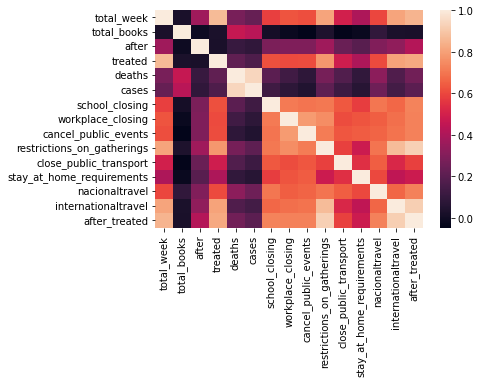

In [302]:
#request the correlation map to see how variables related with each other
import seaborn as sns
correlation= final.corr()
sns.heatmap(correlation)

In [303]:
final.corr()["total_books"]**2

total_week                    0.000448
total_books                   1.000000
after                         0.000074
treated                       0.000732
deaths                        0.214661
cases                         0.182379
school_closing                0.000129
workplace_closing             0.000505
cancel_public_events          0.002373
restrictions_on_gatherings    0.001182
close_public_transport        0.001784
stay_at_home_requirements     0.000549
nacionaltravel                0.007750
internationaltravel           0.000665
after_treated                 0.000616
Name: total_books, dtype: float64

In [304]:
#export DataFrame to CSV file
final.to_csv(r'C:\Users\joana\Desktop\Master\second master\thesis\second thesis\data\dataset_part1.csv', index=False)